In [75]:
import nltk
import string
import torch
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.ndimage import uniform_filter1d    
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import math

from sentence_transformers import SentenceTransformer, util
# Load the Sentence Transformer model 
model = SentenceTransformer('all-mpnet-base-v2')  

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)


In [85]:
#Wikipedia definition of apple
wiki_apple = """The apple is a deciduous tree, generally standing 2 to 4.5 metres (6 to 15 feet) tall in cultivation and up to 9 m (30 ft) in the wild.<SENTENCE_SEP>
When cultivated, the size, shape and branch density are determined by rootstock selection and trimming method.<SENTENCE_SEP>
The leaves are alternately arranged dark green-colored simple ovals with serrated margins and slightly downy undersides.<SENTENCE_SEP>
<SECTION_SEP>
Blossoms are produced in spring simultaneously with the budding of the leaves and are produced on spurs and some long shoots.<SENTENCE_SEP>
The 3-to-4-centimeter flowers are white with a pink tinge that gradually fades, five petaled, with an inflorescence consisting of a cyme with 4–6 flowers.<SENTENCE_SEP>
The central flower of the inflorescence is called the "king bloom"; it opens first and can develop a larger fruit.<SENTENCE_SEP>
<SECTION_SEP>
The fruit is a pome that matures in late summer or autumn, and cultivars exist in a wide range of sizes.<SENTENCE_SEP>
Commercial growers aim to produce an apple that is 7 to 8.5 cm  in diameter, due to market preference.<SENTENCE_SEP>
Some consumers, especially in Japan, prefer a larger apple, while apples less than 5.5 cm are generally used for juicing and have little fresh market value.<SENTENCE_SEP>
<SECTION_SEP>
The groundcolor of ripe apples is yellow, green, yellow-green or whitish yellow.<SENTENCE_SEP> 
The overcolor of ripe apples can be orange-red, pink-red, red, purple-red or brown-red.<SENTENCE_SEP> 
The skin can also be russetted. The overcolor amount can be 0–100%.<SENTENCE_SEP>
The skin may also be wholly or partly russeted i.e. rough and brown.<SENTENCE_SEP>
The skin is covered in a protective layer of epicuticular wax.<SENTENCE_SEP>
The exocarp (flesh) is generally pale yellowish-white, though pink, yellow or green exocarps also occur.<SENTENCE_SEP>
Important volatile compounds in apples include acetaldehyde, ethyl acetate, 1-butanal, ethanol, 2-methylbutanal, 3-methylbutanal, ethyl propionate, ethyl 2-methylpropionate, ethyl butyrate, ethyl 2-methyl butyrate, hexanal, 1-butanol, 3-methylbutyl acetate, 2-methylbutyl acetate, 1-propyl butyrate, ethyl pentanoate, amyl acetate, 2-methyl-1-butanol, trans-2-hexenal, ethyl hexanoate, hexanol.
"""

wiki_paxton = """
Paxton is a city in Ford County, Illinois, United States.<SENTENCE_SEP> 
The population was 4,473 at the 2010 census.<SENTENCE_SEP> 
It is the county seat of Ford County.<SENTENCE_SEP> 
<SECTION_SEP>
The town was initially named Prairie City in the late 1840s, then Prospect City by an Illinois Central Railroad official in 1855.<SENTENCE_SEP> 
However, as Wilbur W. Sauer says that residents noted the town was "all prospect and no city."<SENTENCE_SEP> 
In 1859, it was renamed for Sir Joseph Paxton, architect of the Crystal Palace, who was a major shareholder in the Illinois Central Railroad, which in 1856 was the longest span of railroad in the world (Chicago to Cairo).<SENTENCE_SEP> 
It was rumored that Paxton was interested in organizing an English settlement in Illinois.<SENTENCE_SEP> 
The colony never materialized, but the town kept the name.<SENTENCE_SEP> 
Founded in 1859, Paxton celebrated its sesquicentennial in 2009.<SENTENCE_SEP> 
Augustana College was located in Paxton from 1863–1875, aided by a community effort led by recent Swedish immigrants to fund educational and cultural opportunities for citizens.<SENTENCE_SEP> 
An early public high school was established in 1872; it served the surrounding area for the next several decades, culminating in the formation of a community high school district in May 1920.<SENTENCE_SEP> 
The local school's mascot was the Paxton Mustangs until consolidation with the Buckley-Loda Rockets district in 1990 formed the current Paxton-Buckley-Loda School District, known as the PBL Panthers.<SENTENCE_SEP> 
The school is a member of the IESA and IHSA for interscholastic sports and activities.<SENTENCE_SEP> 
The Ford County Courthouse in Paxton was built in 1906, and boasts many murals painted by the Works Progress Administration during the 1930s.<SENTENCE_SEP> 
On June 22, 1919, former President William Howard Taft visited Paxton while on his way to Champaign.<SENTENCE_SEP> 
After disembarking from a long train ride, Taft delivered a speech in the Pells Park Pavilion in favor of U.S. entry into the newly formed League of Nations.<SENTENCE_SEP> 
Taft's appearance is a testament to the Paxton Chautauqua, which was held in Pells Park from 1905-1930, attracting musicians, speakers and entertainment from all over the United States.<SENTENCE_SEP> 
Taft is one of four U.S. Presidents to visit Ford County, joining William McKinley (Gibson City in 1897), Richard Nixon (Melvin as vice president in 1957), and Gerald Ford (Melvin in 1974).<SENTENCE_SEP> 
From 1865-2007, the "Paxton Daily Record" was published in Paxton, making the paper one of the longest-running daily newspapers of its size in the state of Illinois.<SENTENCE_SEP> 
Today, the "Paxton Weekly Record" is owned by the Champaign "News-Gazette" and continues to publish local news, sports, and other events.<SENTENCE_SEP> 
Due to Paxton having the highest elevation points in the area, the Illinois Central Railroad dug out ground so that the railroad could move at the same elevation, but underneath the city of Paxton.<SENTENCE_SEP> 
When the railroad was cut (around the 1920s), several bridges were built across the railroad to connect the east and west sides of Paxton.<SENTENCE_SEP> 
<SECTION_SEP>
Paxton is located at (40.458745, -88.095784).<SENTENCE_SEP> 
According to the 2010 census, Paxton has a total area of , all land.<SENTENCE_SEP> 
Paxton is directly served by three major highways (I-57, U.S. Route 45, and Illinois Route 9), the Illinois Central Railroad, and a municipal airport with a landing strip .<SENTENCE_SEP> 
<SECTION_SEP>
As of the census of 2000, there were 4,525 people, 1,776 households, and 1,198 families residing in the city.<SENTENCE_SEP> 
The population density was 2,031.4 people per square mile (783.5/km²).<SENTENCE_SEP> 
There were 1,888 housing units at an average density of 847.6 per square mile (326.9/km²).<SENTENCE_SEP> 
The racial makeup of the city was 90.3% White, 7.5% African American, 0.07% Native American 3 total Asians Asian, 0.55% from other races, and 0.86% from two or more races.<SENTENCE_SEP> 
Hispanic or Latino of any race were 1.64% of the population.<SENTENCE_SEP> 
There were 1,776 households out of which 33.2% had children under the age of 18 living with them, 54.7% were married couples living together, 8.8% had a female householder with no husband present, and 32.5% were non-families.<SENTENCE_SEP> 
29.7% of all households were made up of individuals and 14.5% had someone living alone who was 65 years of age or older.<SENTENCE_SEP> 
The average household size was 2.45 and the average family size was 3.02.<SENTENCE_SEP> 
In the city, the population was spread out with 26.1% under the age of 18, 7.7% from 18 to 24, 28.0% from 25 to 44, 19.4% from 45 to 64, and 18.7% who were 65 years of age or older.<SENTENCE_SEP> 
The median age was 38 years.
"""


wiki_paper= """ 
Paper is a thin sheet material produced by mechanically or chemically processing cellulose fibres derived from wood, rags, grasses, or other vegetable sources in water, draining the water through a fine mesh leaving the fibre evenly distributed on the surface, followed by pressing and drying.<SENTENCE_SEP> 
Although paper was originally made in single sheets by hand, almost all is now made on large machines—some making reels 10 metres wide, running at 2,000 metres per minute and up to 600,000 tonnes a year.<SENTENCE_SEP> 
It is a versatile material with many uses, including printing, painting, graphics, signage, design, packaging, decorating, writing, and cleaning. <SENTENCE_SEP> 
It may also be used as filter paper, wallpaper, book endpaper, conservation paper, laminated worktops, toilet tissue, currency, and security paper, or in a number of industrial and construction processes.<SENTENCE_SEP> 
The papermaking process developed in east Asia, probably China, at least as early as 105 CE,[1] by the Han court eunuch Cai Lun, although the earliest archaeological fragments of paper derive from the 2nd century BCE in China.<SENTENCE_SEP> 
The modern pulp and paper industry is global, with China leading its production and the United States following.<SENTENCE_SEP> 
<SECTION_SEP>
The oldest known archaeological fragments of the immediate precursor to modern paper date to the 2nd century BCE in China. <SENTENCE_SEP> 
The pulp papermaking process is ascribed to Cai Lun, a 2nd-century CE Han court eunuch.<SENTENCE_SEP> 
It has been said that knowledge of papermaking was passed to the Islamic world after the Battle of Talas in 751 CE when two Chinese papermakers were captured as prisoners. <SENTENCE_SEP> 
Although the veracity of this story is uncertain, paper started to be made in Samarkand soon after.<SENTENCE_SEP> 
In the 13th century, the knowledge and uses of paper spread from the Middle East to medieval Europe, where the first water-powered paper mills were built.<SENTENCE_SEP> 
Because paper was introduced to the West through the city of Baghdad, it was first called bagdatikos.<SENTENCE_SEP> 
In the 19th century, industrialization greatly reduced the cost of manufacturing paper.<SENTENCE_SEP> 
In 1844, the Canadian inventor Charles Fenerty and the German inventor Friedrich Gottlob Keller independently developed processes for pulping wood fibres.<SENTENCE_SEP> 
<SECTION_SEP>
Before the industrialisation of paper production the most common fibre source was recycled fibres from used textiles, called rags. <SENTENCE_SEP> 
The rags were from hemp, linen and cotton.[7] A process for removing printing inks from recycled paper was invented by German jurist Justus Claproth in 1774.<SENTENCE_SEP> 
Today this method is called deinking. It was not until the introduction of wood pulp in 1843 that paper production was not dependent on recycled materials from ragpickers.<SENTENCE_SEP> 
<SECTION_SEP>
The word paper is etymologically derived from Latin papyrus, which comes from the Greek πᾰ́πῡρος (pápūros), the word for the Cyperus papyrus plant.<SENTENCE_SEP> 
Papyrus is a thick, paper-like material produced from the pith of the Cyperus papyrus plant, which was used in ancient Egypt and other Mediterranean cultures for writing before the introduction of paper.<SENTENCE_SEP> 
Although the word paper is etymologically derived from papyrus, the two are produced very differently and the development of the first is distinct from the development of the second.<SENTENCE_SEP> 
Papyrus is a lamination of natural plant fibre, while paper is manufactured from fibres whose properties have been changed by maceration.<SENTENCE_SEP> 
<SECTION_SEP>
To make pulp from wood, a chemical pulping process separates lignin from cellulose fibre. A cooking liquor is used to dissolve the lignin, which is then washed from the cellulose; this preserves the length of the cellulose fibres.<SENTENCE_SEP>  
Paper made from chemical pulps are also known as wood-free papers (not to be confused with tree-free paper); this is because they do not contain lignin, which deteriorates over time. <SENTENCE_SEP> 
The pulp can also be bleached to produce white paper, but this consumes 5% of the fibres. Chemical pulping processes are not used to make paper made from cotton, which is already 90% cellulose.
"""

wiki_punk=""" 
The punk subculture includes a diverse and widely known array of ideologies, fashion, and other forms of expression, visual art, dance, literature, and film. <SENTENCE_SEP> 
Largely characterised by anti-establishment views, the promotion of individual freedom, and the DIY ethics, the culture originated from punk rock.<SENTENCE_SEP> 
<SECTION_SEP>
The punk subculture emerged in the mid-1970s; in New York in 1974 and in the United Kingdom in 1976.<SENTENCE_SEP> 
Some suggest the name "punk" was borrowed from prison slang.<SENTENCE_SEP> 
In the late 1970s, the subculture began to diversify, which led to the proliferation of factions such as new wave, post-punk, 2 Tone, hardcore punk, no wave, street punk, and Oi!. <SENTENCE_SEP> 
Hardcore punk, street punk, and Oi! sought to do away with the frivolities introduced in the later years of the original punk movement.<SENTENCE_SEP> 
The punk subculture influenced other underground music scenes such as alternative rock, indie music, crossover thrash, and the extreme subgenres of heavy metal (mainly thrash metal, death metal, speed metal, and the NWOBHM).<SENTENCE_SEP> 
<SECTION_SEP>
Punk aesthetics determine the type of art punks enjoy, usually with underground, minimalistic, iconoclastic, and satirical sensibilities. <SENTENCE_SEP> 
Punk artwork graces album covers, flyers for concerts, and punk zines. Usually straightforward with clear messages, punk art is often concerned with political issues such as social injustice and economic disparity. <SENTENCE_SEP> 
The use of images of suffering to shock and create feelings of empathy in the viewer is common. Alternatively, punk artwork may contain images of selfishness, stupidity, or apathy to provoke contempt in the viewer.<SENTENCE_SEP> 
<SECTION_SEP>
Solarpunk is a literary and artistic movement that envisions and works toward actualizing a sustainable future interconnected with nature and community.<SENTENCE_SEP> 
The "solar" represents solar energy as a renewable energy source and an optimistic vision of the future that rejects climate doomerism, while the "punk" refers to the countercultural, post-capitalist, and decolonial enthusiasm for creating such a future.<SENTENCE_SEP> 
<SECTION_SEP>
Cyberpunk is a subgenre of science fiction in a dystopian futuristic setting that tends to focus on a "combination of lowlife and high tech",featuring futuristic technological and scientific achievements, such as artificial intelligence and cyberware, juxtaposed with societal collapse, dystopia or decay.<SENTENCE_SEP> 
Much of cyberpunk is rooted in the New Wave science fiction movement of the 1960s and 1970s, when writers like Philip K. Dick, Michael Moorcock, Roger Zelazny, John Brunner, J. G. Ballard, Philip José Farmer and Harlan Ellison examined the impact of drug culture, technology, and the sexual revolution while avoiding the utopian tendencies of earlier science fiction.<SENTENCE_SEP> 
Released in 1984, William Gibson's influential debut novel Neuromancer helped solidify cyberpunk as a genre, drawing influence from punk subculture and early hacker culture. <SENTENCE_SEP> 
Frank Miller's Ronin is an example of a cyberpunk graphic novel. Other influential cyberpunk writers included Bruce Sterling and Rudy Rucker. <SENTENCE_SEP> 
The Japanese cyberpunk subgenre began in 1982 with the debut of Katsuhiro Otomo's manga series Akira, with its 1988 anime film adaptation (also directed by Otomo) later popularizing the subgenre.<SENTENCE_SEP> 
Comics exploring cyberpunk themes began appearing as early as Judge Dredd, first published in 1977.<SENTENCE_SEP> 
<SECTION_SEP><SENTENCE_SEP> 
Steampunk is a subgenre of science fiction that incorporates retrofuturistic technology and aesthetics inspired by, but not limited to, 19th-century industrial steam-powered machinery.<SENTENCE_SEP> 
Steampunk works are often set in an alternative history of the Victorian era or the American "Wild West", where steam power remains in mainstream use, or in a fantasy world that similarly employs steam power.<SENTENCE_SEP> 
Steampunk features anachronistic technologies or retrofuturistic inventions as people in the 19th century might have envisioned them — distinguishing it from Neo-Victorianism — and is likewise rooted in the era's perspective on fashion, culture, architectural style, and art.<SENTENCE_SEP> 
Such technologies may include fictional machines like those found in the works of H. G. Wells and Jules Verne.<SENTENCE_SEP> 
Other examples of steampunk contain alternative-history-style presentations of such technology as steam cannons, lighter-than-air airships, analog computers, or such digital mechanical computers as Charles Babbage's Analytical Engine.
"""

wiki_cs=""" 
Computer science is the study of computation, information, and automation.<SENTENCE_SEP> 
Computer science spans theoretical disciplines (such as algorithms, theory of computation, and information theory) to applied disciplines (including the design and implementation of hardware and software).<SENTENCE_SEP>    
Algorithms and data structures are central to computer science.<SENTENCE_SEP> 
<SECTION_SEP>
It has since been argued that computer science can be classified as an empirical science since it makes use of empirical testing to evaluate the correctness of programs, but a problem remains in defining the laws and theorems of computer science (if any exist) and defining the nature of experiments in computer science.<SENTENCE_SEP> 
Proponents of classifying computer science as an engineering discipline argue that the reliability of computational systems is investigated in the same way as bridges in civil engineering and airplanes in aerospace engineering.<SENTENCE_SEP> 
They also argue that while empirical sciences observe what presently exists, computer science observes what is possible to exist and while scientists discover laws from observation, no proper laws have been found in computer science and it is instead concerned with creating phenomena.<SENTENCE_SEP> 
<SECTION_SEP>
According to Peter Denning, the fundamental question underlying computer science is, "What can be automated?" <SENTENCE_SEP> 
Theory of computation is focused on answering fundamental questions about what can be computed and what amount of resources are required to perform those computations. <SENTENCE_SEP> 
In an effort to answer the first question, computability theory examines which computational problems are solvable on various theoretical models of computation. <SENTENCE_SEP> 
The second question is addressed by computational complexity theory, which studies the time and space costs associated with different approaches to solving a multitude of computational problems.<SENTENCE_SEP> 
<SECTION_SEP>
Information theory, closely related to probability and statistics, is related to the quantification of information. <SENTENCE_SEP> 
This was developed by Claude Shannon to find fundamental limits on signal processing operations such as compressing data and on reliably storing and communicating data.<SENTENCE_SEP> 
Coding theory is the study of the properties of codes (systems for converting information from one form to another) and their fitness for a specific application. <SENTENCE_SEP> 
Codes are used for data compression, cryptography, error detection and correction, and more recently also for network coding. Codes are studied for the purpose of designing efficient and reliable data transmission methods. <SENTENCE_SEP> 
<SECTION_SEP>
Data structures serve as the basis for abstract data types (ADT). The ADT defines the logical form of the data type. <SENTENCE_SEP> 
The data structure implements the physical form of the data type.<SENTENCE_SEP> 
Different types of data structures are suited to different kinds of applications, and some are highly specialized to specific tasks. <SENTENCE_SEP> 
For example, relational databases commonly use B-tree indexes for data retrieval,[6] while compiler implementations usually use hash tables to look up identifiers.<SENTENCE_SEP> 
<SECTION_SEP>
Programming language theory is a branch of computer science that deals with the design, implementation, analysis, characterization, and classification of programming languages and their individual features. <SENTENCE_SEP> 
It falls within the discipline of computer science, both depending on and affecting mathematics, software engineering, and linguistics. <SENTENCE_SEP> 
It is an active research area, with numerous dedicated academic journals.<SENTENCE_SEP> 
Formal methods are a particular kind of mathematically based technique for the specification, development and verification of software and hardware systems.<SENTENCE_SEP> 
The use of formal methods for software and hardware design is motivated by the expectation that, as in other engineering disciplines, performing appropriate mathematical analysis can contribute to the reliability and robustness of a design. <SENTENCE_SEP> 
<SECTION_SEP>
Information can take the form of images, sound, video or other multimedia. <SENTENCE_SEP> 
Bits of information can be streamed via signals. Its processing is the central notion of informatics, the European view on computing, which studies information processing algorithms independently of the type of information carrier – whether it is electrical, mechanical or biological.<SENTENCE_SEP>  
This field plays important role in information theory, telecommunications, information engineering and has applications in medical image computing and speech synthesis, among others. <SENTENCE_SEP> 
What is the lower bound on the complexity of fast Fourier transform algorithms? is one of unsolved problems in theoretical computer science.<SENTENCE_SEP> 
<SECTION_SEP>
Artificial intelligence (AI) aims to or is required to synthesize goal-orientated processes such as problem-solving, decision-making, environmental adaptation, learning, and communication found in humans and animals. <SENTENCE_SEP> 
From its origins in cybernetics and in the Dartmouth Conference (1956), artificial intelligence research has been necessarily cross-disciplinary, drawing on areas of expertise such as applied mathematics, symbolic logic, semiotics, electrical engineering, philosophy of mind, neurophysiology, and social intelligence. <SENTENCE_SEP> 
AI is associated in the popular mind with robotic development, but the main field of practical application has been as an embedded component in areas of software development, which require computational understanding. <SENTENCE_SEP> 
The starting point in the late 1940s was Alan Turing's question "Can computers think?", and the question remains effectively unanswered, although the Turing test is still used to assess computer output on the scale of human intelligence. <SENTENCE_SEP> 
But the automation of evaluative and predictive tasks has been increasingly successful as a substitute for human monitoring and intervention in domains of computer application involving complex real-world data.
"""

wiki_emotions=""" 
"""

wiki_smoking=""" 
"""

In [106]:
PUNCTUATION = string.punctuation

def create_tokens(sentence,seq_token):
    for p in PUNCTUATION:
        sentence = sentence.replace(p, ' ')
    sentence = nltk.word_tokenize(sentence)
    tokens = [w.lower() for w in sentence]
    seq_tkns=[]
    for i in range(0, len(tokens) - seq_token + 1, seq_token):
        seq_tkns.append(tokens[i:i + seq_token])
    return seq_tkns


def create_blocks(tokens, block_size, overlap_size):
    blocks = []
    for i in range(0, len(tokens) - block_size + 1, overlap_size):
        blocks.append(tokens[i:i + block_size])
    return blocks

# funzione che rimuove le stopwords, segni di punteggiatura e numeri
def clean_phrase(phrase):
    words = word_tokenize(phrase.lower())
    cleaned_words = [word for word in words if word.lower() not in stop_words and word not in punctuation and not word.isdigit() and word !="''"]
    return cleaned_words

#restituisce il calcolo della cosine similarity tra due blocchi
def cosine_similarity(block1,block2):
    block1 = [clean_phrase(phrase) for phrase in block1]
    block2 = [clean_phrase(phrase) for phrase in block2]
    block1_merged= [word for sublist in block1 for word in sublist]
    block2_merged= [word for sublist in block2 for word in sublist]
    block1_dict = Counter(block1_merged)
    block2_dict = Counter(block2_merged)
    words = list(block1_dict.keys() | block2_dict.keys())
    numerator=0
    denominator_1=0
    denominator_2=0
    for word in words:
        numerator+=block1_dict[word]*block2_dict[word]
        denominator_1 += block1_dict[word]**2  
        denominator_2 += block2_dict[word]**2
    cos_sim=numerator / math.sqrt(denominator_1 * denominator_2)
    return cos_sim


def sentence_transformer_similarity(block1, block2):
  """Computes the similarity between two same-size lists of strings using Sentence Transformers."""

  AGGREGATION="average"

  # Get sentence embeddings
  embeddings1 = model.encode(block1)
  embeddings2 = model.encode(block2)

  # Calculate pairwise cosine similarities
  similarities = util.pytorch_cos_sim(embeddings1, embeddings2)

  # Handle potential empty similarity matrix (all sentences might be identical)
  if similarities.shape[0] == 1 and similarities.shape[1] == 1:
    return similarities.item()

  # Aggregate pairwise similarities
  if AGGREGATION == "average":
    similarity = torch.mean(similarities).item()
  elif AGGREGATION == "max":
    similarity = torch.max(similarities).item()
  else:
    raise ValueError(f"Invalid aggregation method: {AGGREGATION}")

  return similarity   


def find_section_sep_indices(doc):
  """Finds all the word index occurrences of '<SECTION_SEP>' in a string doc"""
  indices = []
  offset = 0
  while True:
    i = doc.find('<SECTION_SEP>', offset)
    if i == -1:
      break
    indices.append(i)
    offset = i + len('<SECTION_SEP>')
  return indices

def find_section_start_indices(text):
    
    sections=text.split('<SECTION_SEP>')

    boundaries=[]
    count=0
    for sec in sections[:-1]:
        sentences=sec.split('<SENTENCE_SEP>')
        count+=len(sentences)-1
        boundaries.append(count)

    return boundaries


def plot_similiraty(graph,similarity,smoothed_similarities):
    xpoints = np.arange(len(similarity))
    ypoints = similarity
    xpoints_smooth = np.arange(len(smoothed_similarities))
    ypoints_smooth = smoothed_similarities
    graph.plot(xpoints, ypoints, '-o', color='red', label='Similarities')
    graph.plot(xpoints_smooth, ypoints_smooth, '-o', color='blue', label='Smoothed similarities')
    graph.set_title("Sentence Transformer") 


def get_boundaries(similarities):
    depth_score_sim=[]
    for i in range(1,len(similarities)-1):
        score=(similarities[i-1]-similarities[i])+(similarities[i+1]-similarities[i])
        depth_score_sim.append(score)
    depth_score_sim.insert(0,similarities[1]-similarities[0])
    depth_score_sim.append(similarities[-2]-similarities[-1])

    filtered=list(filter(lambda x: x > 0, depth_score_sim))
    std=np.std(filtered)
    mean=np.mean(filtered)
    threshold=(mean-(std))
    boundaries= [i for i, v in enumerate(depth_score_sim) if v > threshold]
    boundaries = [x+1 for x in boundaries]
    return boundaries

def boundaries_error(actual,predicted,block_len):
  errors=[]
  for boundary in actual:
    min_edit_distance=6000
    for pr in predicted:
      edit_distance=abs(boundary-(pr*block_len))
      if(edit_distance<min_edit_distance):
        min_edit_distance=edit_distance
    errors.append(min_edit_distance)
  return sum(errors)
  

         



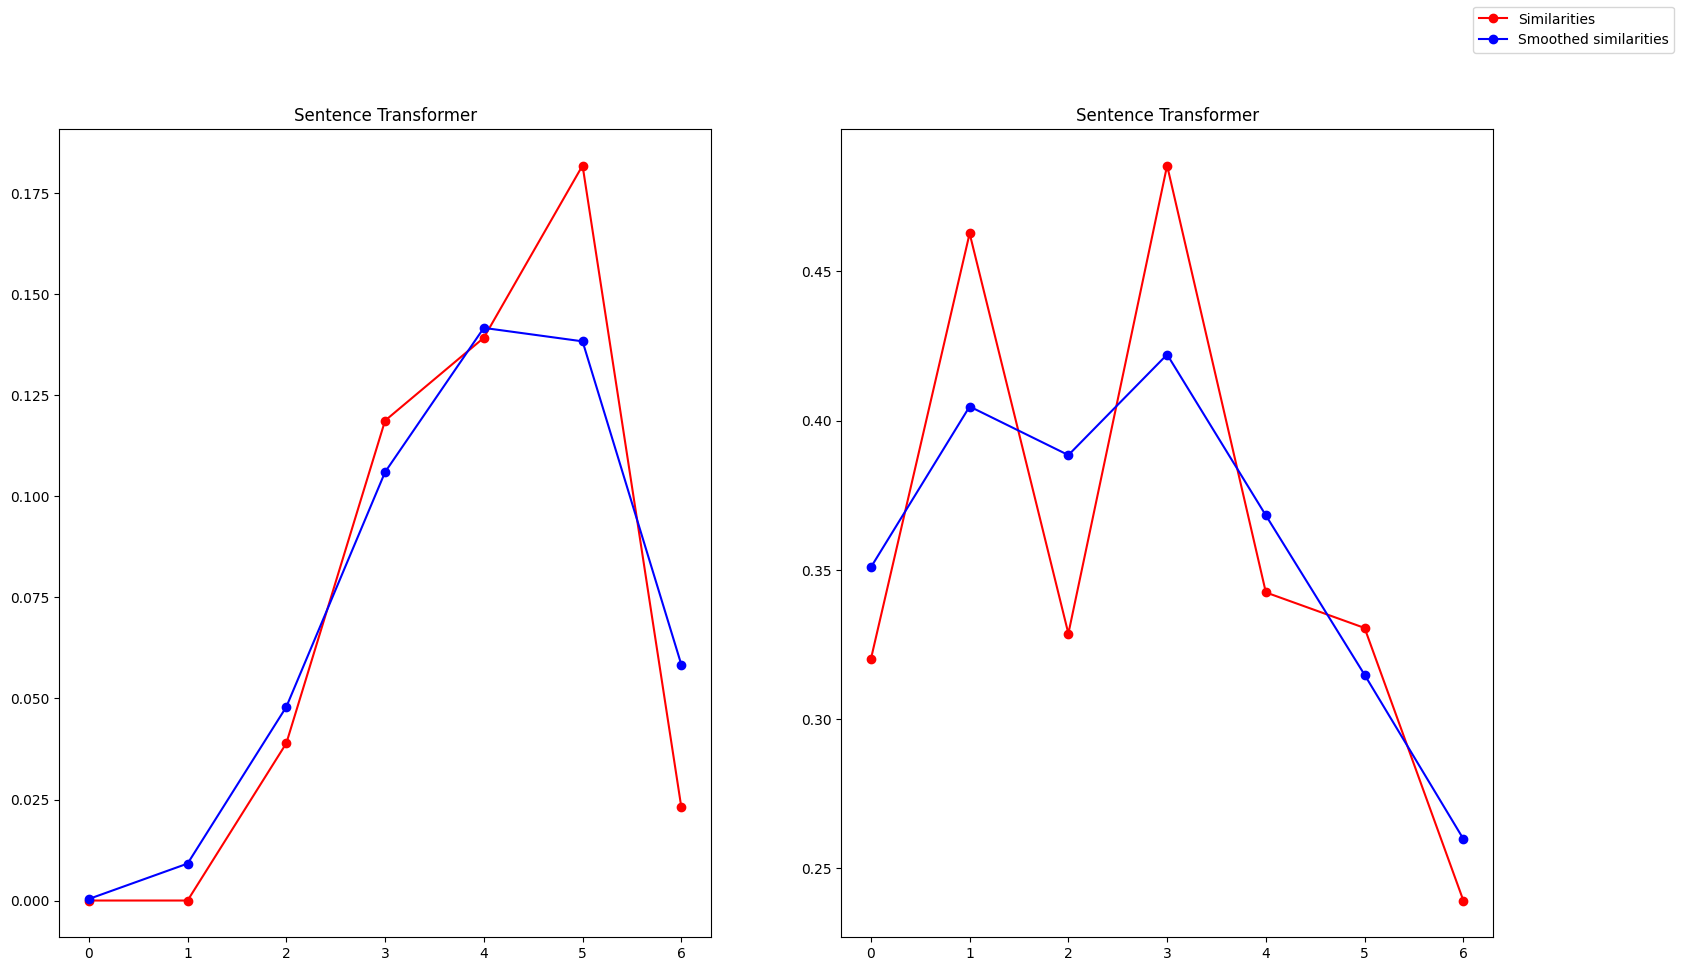

[1, 2, 3, 7]
4
[1, 3, 7]
4
[3, 6, 9]


In [118]:

#Contains the documents
docs=[wiki_apple,wiki_paxton,wiki_paper,wiki_punk,wiki_cs]

#Contains, for each doc, the the idexes of paragraph separators
docs_sections=[]
for doc in docs:
    #sections_pos=find_section_sep_indices(doc)
    sections_pos=find_section_start_indices(doc)
    docs_sections.append(sections_pos)

#Contains the documents, but splitted each sentence by sentence
docs_sent_by_sent=[]
for doc in docs:
    doc_t=doc.replace('<SECTION_SEP>','')
    doc_t=doc_t.replace('\r', '').replace('\n', '')
    doc_splitted=doc_t.split('<SENTENCE_SEP>')
    docs_sent_by_sent.append(doc_splitted)


#Number of sentence considered in a block
N_BLOCK=2
SENT_NUM=0


doc=docs_sent_by_sent[SENT_NUM]

blocks = []
for i in range(0, len(doc), N_BLOCK):
    if i + (N_BLOCK-1) < len(doc):
        blocks.append(doc[i:i + N_BLOCK])
    else:
        blocks.append(doc[i:])






#Plot traditional similarity method
lexical_similarities=[]
transformer_similarities=[]

for i in range(0,len(blocks)-1):
    lex_similarity=cosine_similarity(blocks[i],blocks[i+1])
    lexical_similarities.append(lex_similarity)
    bert_similarity=sentence_transformer_similarity(blocks[i],blocks[i+1])
    transformer_similarities.append(bert_similarity)





smoothed_lexical_similarities=gaussian_filter1d(lexical_similarities, sigma=0.7)
smoothed_transformer_similarities=gaussian_filter1d(transformer_similarities, sigma=0.7)

figure, axis = plt.subplots(1, 2) 
figure.set_size_inches(18.5, 10.5)

plot_similiraty(axis[0],lexical_similarities,smoothed_lexical_similarities)
plot_similiraty(axis[1],transformer_similarities,smoothed_transformer_similarities)


figure.legend(['Similarities','Smoothed similarities'])
plt.show()


boundaries=get_boundaries(smoothed_lexical_similarities)
print(boundaries)
print(boundaries_error(docs_sections[SENT_NUM],boundaries,N_BLOCK))

boundaries=get_boundaries(smoothed_transformer_similarities)
print(boundaries)
print(boundaries_error(docs_sections[SENT_NUM],boundaries,N_BLOCK))

print(docs_sections[SENT_NUM])

#[3, 7, 11, 15, 19, 24, 28]
#4 8 16 24
#1 + 1 + 3 + 1 +3 + 0 + 4
#13
#[2, 4, 6, 8, 10]
#4 8 12 16 20
#1 + 1 + 3 + 1 +3 + 0 + 4
#19
    
